In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("kyphosis.csv")
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
data.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


<Figure size 1440x720 with 0 Axes>

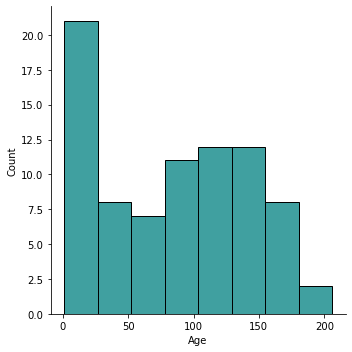

In [5]:
plt.figure(figsize = (20,10))
sns.displot(data['Age'], color = "teal")

<Figure size 1440x720 with 0 Axes>

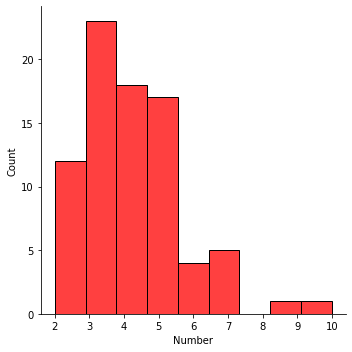

In [6]:
plt.figure(figsize = (20,10))
sns.displot(data['Number'], color = "red")

In [7]:
data['Age'].value_counts()

1      5
2      3
18     2
140    2
131    2
      ..
125    1
112    1
52     1
20     1
36     1
Name: Age, Length: 64, dtype: int64

In [8]:
data['Number'].value_counts()

3     23
4     18
5     17
2     12
7      5
6      4
9      1
10     1
Name: Number, dtype: int64

In [9]:
data['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

<AxesSubplot:title={'center':'Kyphosis distribution'}, xlabel='Age', ylabel='Number'>

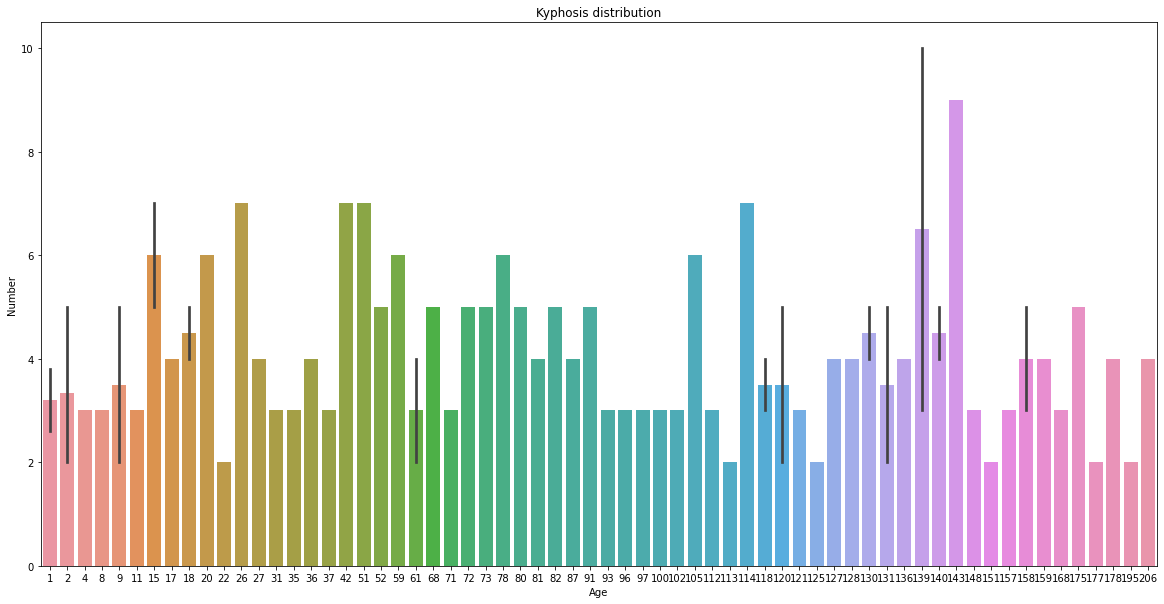

In [10]:
plt.figure(figsize = (20, 10))
plt.title("Kyphosis distribution")
sns.barplot(x = 'Age', y = 'Number', data = data)

<AxesSubplot:xlabel='Age', ylabel='Number'>

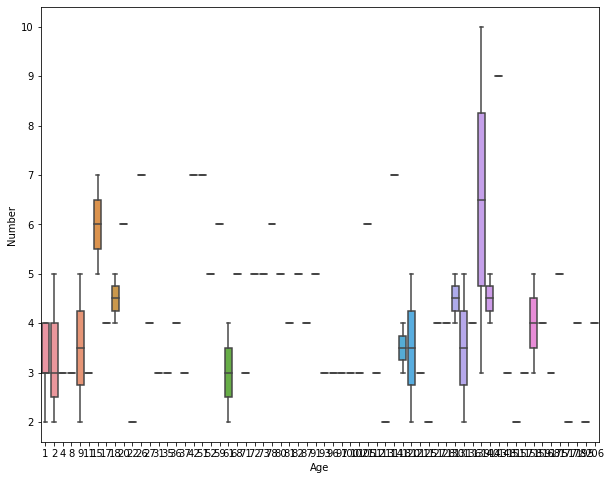

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Age', y = 'Number', data = data )

<AxesSubplot:>

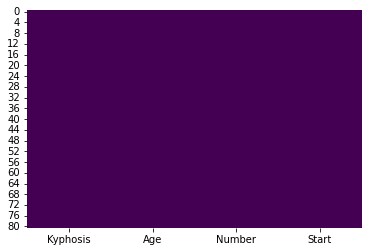

In [12]:
sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')

In [13]:
data['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [14]:
map = {'absent':0, 'present':1}
map

{'absent': 0, 'present': 1}

In [15]:
data['Kyphosis'] = data['Kyphosis'].replace(map)
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [16]:
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [17]:
data = data.dropna()
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


data['Age_per_Start'] = data['Age']/data['Start']
data

In [18]:
data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [19]:
X = data.drop('Kyphosis', axis = 1)
y = data['Kyphosis']

In [20]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [21]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
accuracy = lr.score(X_train, y_train)
accuracy

0.84375

In [25]:
y_predict = lr.predict(X_test)
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
accuracy_test = lr.score(X_test, y_test)
accuracy_test

0.8235294117647058

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predict)
cm

array([[12,  0],
       [ 3,  2]], dtype=int64)

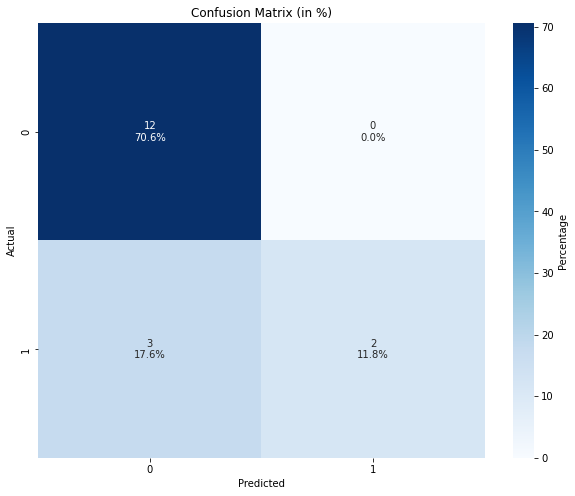

In [28]:
cm = np.array([[12,  0],
       [ 3,  2]])

cm_percent = cm / cm.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(cm, cm_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (in %)')
plt.show()

In [29]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.40      0.57         5

    accuracy                           0.82        17
   macro avg       0.90      0.70      0.73        17
weighted avg       0.86      0.82      0.80        17



In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# y_pred = (rf.predict_proba(X_test)[:, 1]>= 0.5.astype(int))
fr_pred = rf.predict(X_test)
fr_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
cm2 = confusion_matrix(y_test, fr_pred)
cm2

array([[12,  0],
       [ 3,  2]], dtype=int64)

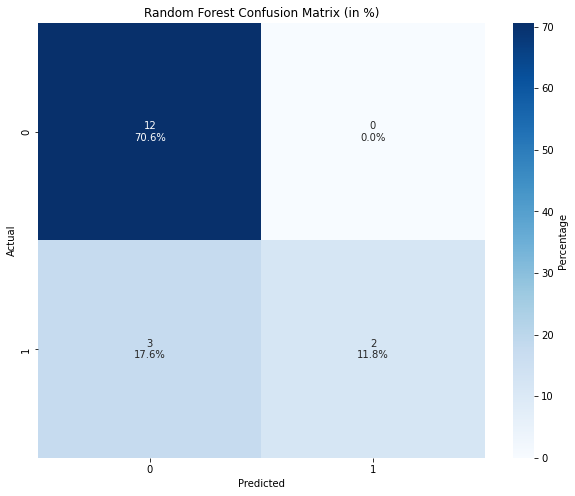

In [34]:
cm = np.array([[12,  0],
       [ 3,  2]])

cm_percent = cm / cm.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(cm, cm_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (in %)')
plt.show()

In [35]:
cr2 = classification_report(y_test, fr_pred)
print(cr2)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.40      0.57         5

    accuracy                           0.82        17
   macro avg       0.90      0.70      0.73        17
weighted avg       0.86      0.82      0.80        17



In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_model = DecisionTreeClassifier()

In [38]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
cr3 = classification_report(y_test, y_pred_dt)
print(cr3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [52]:
cm3 = confusion_matrix(y_test, y_pred_dt)
cm3

array([[12,  0],
       [ 0,  5]], dtype=int64)

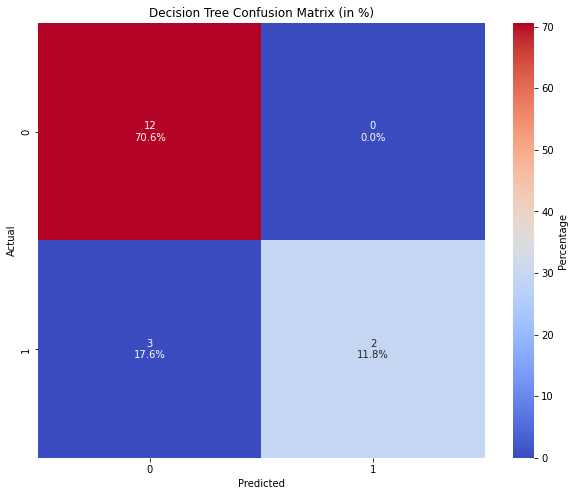

In [54]:
cm3 = np.array([[12,  0],
       [ 0,  5]])

cm3_percent = cm3 / cm3.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(cm, cm_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm3_percent, annot=labels, fmt='', cmap='coolwarm', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix (in %)')
plt.show()

In [40]:
from sklearn.svm import SVC

In [41]:
svm_model = SVC(kernel='linear', C=1, random_state = 101)

In [42]:
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=101)

In [43]:
y_predic = svm_model.predict(X_test)
y_predic

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
# Cross Validation
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
scores.mean()

0.7833333333333333

In [46]:
from sklearn.metrics import accuracy_score

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [61]:
cr4 = classification_report(y_test, y_pred_xgb)
print(cr4)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.80      0.89         5

    accuracy                           0.94        17
   macro avg       0.96      0.90      0.92        17
weighted avg       0.95      0.94      0.94        17



In [62]:
cm4 = confusion_matrix(y_test, y_pred_xgb)
cm4

array([[12,  0],
       [ 1,  4]], dtype=int64)

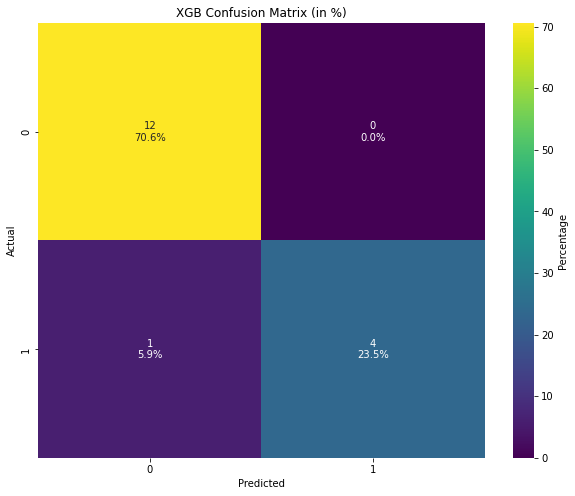

In [63]:
cm4 = np.array([[12,  0],
       [ 1,  4]])

cm4_percent = cm4 / cm4.sum() * 100

labels = np.array([["{0}\n{1:.1f}%".format(value, percent)
                   for value, percent in zip(row, row_percent)]
                  for row, row_percent in zip(cm4, cm4_percent)])

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm4_percent, annot=labels, fmt='', cmap='viridis', cbar_kws={'label': 'Percentage'})

# formatting
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix (in %)')
plt.show()

In [64]:
model_accuracies = {'Logistic Regression': accuracy_score(y_test, y_predict), 
                    'Random Forest Classifier': accuracy_score(y_test, fr_pred), 
                    'Decision Tree Classifier': accuracy_score(y_test, y_pred_dt),
                   'Support Vector Machines': accuracy_score(y_test, y_predic),
                   'XGBoost Classifier': accuracy_score(y_test, y_pred_xgb)}

print("Model Accuracies:") 
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.3f}")

Model Accuracies:
Logistic Regression: 0.824
Random Forest Classifier: 0.824
Decision Tree Classifier: 1.000
Support Vector Machines: 0.706
XGBoost Classifier: 0.941


In [65]:
import joblib

In [66]:
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [67]:
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [70]:
joblib.dump(dt_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [71]:
joblib.dump(xgb_model, 'XGBoost_model.pkl')

['XGBoost_model.pkl']

In [72]:
models = {'logistic_regression': lr, 'decision_tree': dt_model, 'random_forest': model, 'XGBoost': xgb_model}

In [73]:
joblib.dump(models, 'kyphosis_models.pkl')

['kyphosis_models.pkl']